In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Cálculo A2max, rmax, phimax vs tiempo - GADGET

In [12]:
import h5py
import rotation as rot
import barstrength2 as strng
import time_conversion as tiempo
import bines2 as bines

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

vector = ('00','01','03')
vector3 = ('M31','MW','M33')
vector2= ('blue', 'red', 'green')

atime = np.loadtxt('/home/ornela/SimCLUES/redshift_outputs.txt')
aexp = atime[:,2]

snapshot=range(496,50,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    for i in range(0,2):
        cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value

        pstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
        vel  = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Velocities'].value

        z = a0/aexp[isnap] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time = tiempo.conv(z, h, omega_lambda, omega_matter)
        
#---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
        ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
        zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
        r = np.sqrt(xstr**2+ystr**2+zstr**2)
         
        v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
        v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
        v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.
        
#----------------------masas----------------------------
        mstr = mstr/h
        
        r200 = r200*aexp[isnap]/h
        
        rgal=0.15*r200
        
        limit = np.where(r < rgal)
        r_sort = np.sort(r[limit])
        r_indice = np.argsort(r[limit])
        
        Mc_str = cumsum((mstr[limit])[r_indice])
        M_gal = Mc_str[-1]
        
#------------------ calculamos M90------------------------------------------
        razon = Mc_str/M_gal
        noventa, = np.where(razon < 0.9)
        cincuenta, = np.where(razon < 0.5)
        
        r90 = r_sort[noventa][-1]
        r50 = r_sort[cincuenta][-1]
#         M90 = Mc_str[noventa]                

#-------------------------------------------------------------------            
        corte,=np.where(r<3*aexp[isnap])
        veloc,=np.where(r<r50)
        
#----------componentes de la velocidad del centro de masa------------
        vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
        vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
        vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])
        
#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
        vx = v_x - vxcm
        vy = v_y - vycm
        vz = v_z - vzcm
        
        e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp[isnap])

        xn = e1x*xstr + e1y*ystr + e1z*zstr
        yn = e2x*xstr + e2y*ystr + e2z*zstr
        zn = e3x*xstr + e3y*ystr + e3z*zstr
        vxn = e1x*vx + e1y*vy + e1z*vz
        vyn = e2x*vx + e2y*vy + e2z*vz
        vzn = e3x*vx + e3y*vy + e3z*vz
        
        
        A2max, rmax, phimax = strng.a2max(mstr[corte], xn[corte], yn[corte], 20)
#         print 'phimax=', phimax, 'A2max=', A2max, 'rbinmax=', rmax
#--------------------------------------------------------------------------------------------------------------------

        archivo1 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector3[i])+'_A2max_time.dat','a')
        archivo1.write(str('%12.6f'% time) +'\t'+
                 str('%12.6f'% A2max) +'\t'+
                 str('%12.6f'% phimax) +'\t'+
                 str('%12.6f'% rmax) +'\n')
        archivo1.close()


## Cálculo A2max, rmax, phimax vs tiempo - GASOLINE

In [18]:
import h5py
import rotation as rot
import barstrength2 as strng

a0=1

vector = (1,2,4)
vector2 = ('M31', 'MW')
snapshot = np.loadtxt('/home/ornela/SimCLUES/Gasoline/snapshots.txt', dtype='string')


for j in range(len(snapshot)-1,0,-1):
    snap = h5py.File('/home/ornela/SimCLUES/Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')

#     print snapshot[j]

    for i in range(0,2):
        cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
        r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
        time = snap['subhalo_00'+ str('%s' %vector[i])+ '/Time'].value
        h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value
        aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value

        pstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
        mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'].value
        vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'].value

#---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = pstr[:,0]-cm[0]
        ystr = pstr[:,1]-cm[1]
        zstr = pstr[:,2]-cm[2]
        r = np.sqrt(xstr**2+ystr**2+zstr**2)

#------------------------------------------------
        r200 = r200*aexp
        rgal=0.15*r200

        limit = np.where(r<rgal)
        r_sort = np.sort(r[limit])
        r_indice = np.argsort(r[limit])


        Mc_str = cumsum((mstr[limit])[r_indice])
        M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
        razon = Mc_str/M_gal
        noventa, = np.where(razon < 0.9)
        cincuenta, = np.where(razon < 0.5)

        r90 = r_sort[noventa][-1]
        r50 = r_sort[cincuenta][-1]
        M90 = Mc_str[noventa]                

#-------------------------------------------------------------------            
        corte,=np.where(r<3*aexp)
        veloc,=np.where(r<r50)

#----------componentes de la velocidad del centro de masa------------
        vxcm = sum(mstr[veloc]*vel[veloc,0])/sum(mstr[veloc])
        vycm = sum(mstr[veloc]*vel[veloc,1])/sum(mstr[veloc])
        vzcm = sum(mstr[veloc]*vel[veloc,2])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
        vx = vel[:,0] - vxcm
        vy = vel[:,1] - vycm
        vz = vel[:,2] - vzcm

        e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp)

        xn = e1x*xstr + e1y*ystr + e1z*zstr
        yn = e2x*xstr + e2y*ystr + e2z*zstr
        zn = e3x*xstr + e3y*ystr + e3z*zstr
        vxn = e1x*vx + e1y*vy + e1z*vz
        vyn = e2x*vx + e2y*vy + e2z*vz
        vzn = e3x*vx + e3y*vy + e3z*vz


        A2max, rmax, phimax = strng.a2max(mstr[corte], xn[corte], yn[corte], 20)
        
#--------------------------------------------------------------------------------------------------------------------

        archivo1 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector3[i])+'_A2max_time.dat','a')
        archivo1.write(str('%12.6f'% time) +'\t'+
                 str('%12.6f'% A2max) +'\t'+
                 str('%12.6f'% phimax) +'\t'+
                 str('%12.6f'% rmax) +'\n')
        archivo1.close()
        

In [19]:
M31_gd = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_A2max_time.dat')
time_M31gd  = M31_gd[:,0]
A2max_M31gd = M31_gd[:,1]
phim_M31gd  = M31_gd[:,2]
rmax_M31gd  = M31_gd[:,3]

#------------------------------------------------------------------------------------------

MW_gd = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/MW_A2max_time.dat')
time_MWgd  = MW_gd[:,0]
A2max_MWgd = MW_gd[:,1]
phim_MWgd  = MW_gd[:,2]
rmax_MWgd  = MW_gd[:,3]

#------------------------------------------------------------------------------------------

M31_gs = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/M31_A2max_time.dat')
time_M31gs  = M31_gs[:,0]
A2max_M31gs = M31_gs[:,1]
phim_M31gs  = M31_gs[:,2]
rmax_M31gs  = M31_gs[:,3]

#------------------------------------------------------------------------------------------
MW_gs = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/MW_A2max_time.dat')
time_MWgs  = MW_gs[:,0]
A2max_MWgs = MW_gs[:,1]
phim_MWgs  = MW_gs[:,2]
rmax_MWgs  = MW_gs[:,3]


### Datos del viejo omega_bar

In [20]:
cm = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd_/barras/new_phi_time.dat')
time =cm[:,1]
phi =cm[:,2]

kk = len(phi)-1

delta_phi = np.zeros(len(phi))
delta_t = np.zeros(len(phi))
tt = np.zeros(len(phi))

for i in range(kk,0,-1):
    delta_t [i]  = time[i-1] - time[i]
    delta_phi[i] = phi[i-1] - phi[i]
    tt[i] = (time[i-1] + time[i]) / 2.

delta_t   = delta_t[1:]
delta_phi = delta_phi[1:]
tt = tt[1:]

veloc_ang = delta_phi/delta_t


## Graficamos A2max vs time

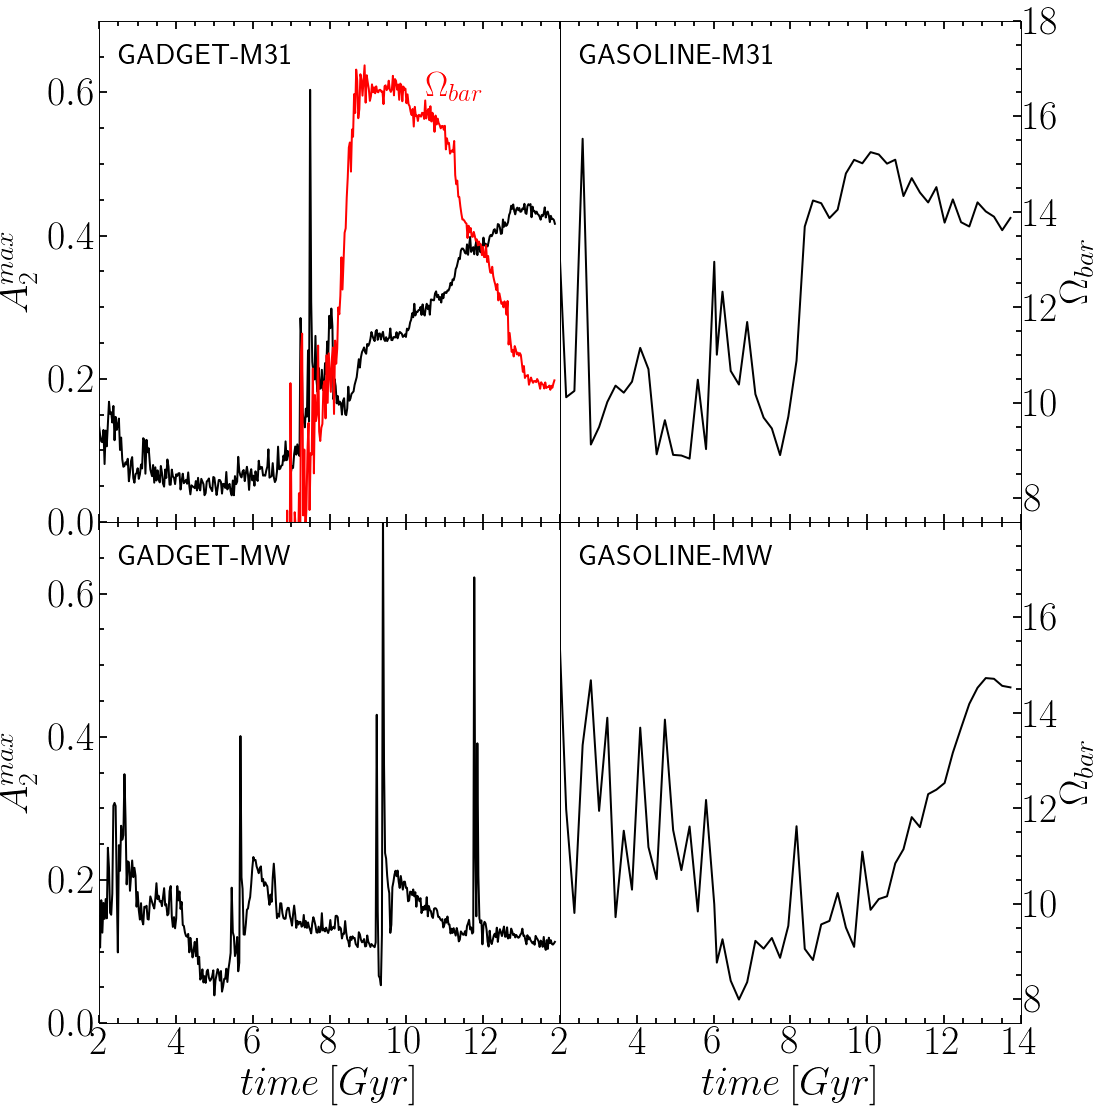

In [21]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))#,sharey=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.9, top = 0.95, wspace=0., hspace= 0)

ax[0,0].plot(time_M31gd ,A2max_M31gd,'-', lw=2, color='k')
# ax[0,0].plot(time_M31gd2 ,A2max_M31gd2,'-', lw=3, color='r')
ax[0,0].set_ylabel(r'$A_{2}^{max}$', fontsize=40)
ax[0,0].set_xticks([2,4,6,8,10,12,14])
ax[0,0].set_xticklabels([])
# ax[0,0].set_yticks([8,9,10,11,12])
# ax[0,0].set_xticklabels([])
ax[0,0].set_ylim(0,0.7)
ax[0,0].set_xlim(2,14)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax[0,0].text(2.5, 0.65, 'GADGET-M31', fontsize=30, color='k', ha='left', va='center')

ax0 = ax[0,0].twinx()
ax0.plot(tt ,veloc_ang/360.,'-', lw=2, color='r')
# ax[0,0].plot(time_M31gd2 ,A2max_M31gd2,'-', lw=3, color='r')
# ax0.set_ylabel(r'$A_{2}^{max}$', fontsize=40)
ax0.set_xticks([2,4,6,8,10,12,14])
ax0.set_xticklabels([])
ax0.set_yticks([])
# ax[0,0].set_yticks([8,9,10,11,12])
# ax[0,0].set_xticklabels([])
# ax[0,0].set_ylim(8,12.5)
ax0.set_xlim(2,14)
ax0.set_ylim(7.5,18)
ax0.minorticks_on()
ax0.tick_params( labelsize=40)
ax0.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax0.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax0.text(10.5,16.5, r'$\Omega_{bar}$', fontsize= 35, color='r', ha='left', va='center')

#------------------------------------------------------

# ax2=fig.add_subplot(222)
ax[0,1].plot(time_M31gs ,A2max_M31gs,'-', lw=2, color='k')
# ax[0,1].plot(time_M31gs2 ,A2max_M31gs2,'-',lw=3, color='r')
# ax[0,1].set_xticks([2,4,6,8,10,12,14])
# ax[0,1].set_xticklabels([])
ax[0,1].set_yticks([])
ax[0,1].set_ylim(0,0.7)
ax[0,1].set_xlim(2,14)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax[0,1].text(2.5, 0.65, 'GASOLINE-M31', fontsize=30, color='k', ha='left', va='center')

ax1 = ax[0,1].twinx()
ax1.set_ylabel(r'$\Omega_{bar}$', fontsize=40)
ax1.set_xticks([2,4,6,8,10,12,14])
ax1.set_xticklabels([])
# ax[0,0].set_xticklabels([])
# ax[0,0].set_ylim(8,12.5)
ax1.set_xlim(2,14)
ax1.set_ylim(7.5,18)
ax1.minorticks_on()
ax1.tick_params( labelsize=40)
ax1.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax1.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

# # #---------------------------------------------------------

# ax3=fig.add_subplot(223)
ax[1,0].plot(time_MWgd ,A2max_MWgd,'-', lw=2, color='k')
# ax[1,0].plot(time_MWgd2 ,A2max_MWgd2,'-', lw=3, color='r')

ax[1,0].set_xticks([2,4,6,8,10,12])
ax[1,0].set_ylabel(r'$A_{2}^{max}$', fontsize=40)
ax[1,0].set_xlabel(r'$time\:[Gyr]$', fontsize=40)
ax[1,0].set_xlim(2,14)
ax[1,0].set_ylim(0,0.7)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax2 = ax[1,0].twinx()
# ax[0,0].set_yticks([8,9,10,11,12])
# ax[0,0].set_xticklabels([])
# ax[0,0].set_ylim(8,12.5)
ax2.set_yticks([])
ax2.set_ylim(7.5,18)
ax2.set_xlim(2,14)
ax2.minorticks_on()
ax2.tick_params( labelsize=40)
ax2.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax2.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax[1,0].text(2.5, 0.65, 'GADGET-MW', fontsize=30, color='k', ha='left', va='center')


# # #---------------------------------------------------------------------------------------
# # ax4=fig.add_subplot(224)
ax[1,1].plot(time_MWgs ,A2max_MWgs,'-', lw=2, color='k')
# ax[1,1].plot(time_MWgs2 ,A2max_MWgs2,'-', lw=3, color='r')
ax[1,1].set_xticks([2,4,6,8,10,12,14])
ax[1,1].set_yticks([])
ax[1,1].set_xlabel(r'$time\:[Gyr]$', fontsize=40)
ax[1,1].set_xlim(2,14)
ax[1,1].set_ylim(0,0.7)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax3 = ax[1,1].twinx()
ax3.set_xticks([2,4,6,8,10,12,14])
ax3.set_yticks([8,10,12,14,16])
ax3.set_ylabel(r'$\Omega_{bar}$', fontsize=40)
# ax[0,0].set_xticklabels([])
ax3.set_ylim(7.5,18)
ax3.set_xlim(2,14)
ax3.minorticks_on()
ax3.tick_params( labelsize=40)
ax3.tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax3.tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax[1,1].text(2.5, 0.65, 'GASOLINE-MW', fontsize=30, color='k', ha='left', va='center')

fig.savefig('/home/ornela/Dropbox/Presentacion_graficos/A2max_time.png', dpi = 100, xxbox_inches='tight')

plt.show()

## phi vs time

In [33]:
print phim_M31gd1[0]/2

0.8300135


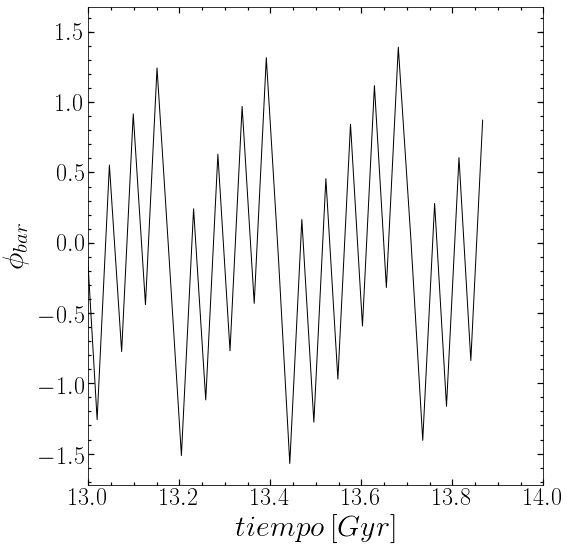

In [23]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time_M31gd, phim_M31gd,'k-', lw=1)
# ax.set_xlim(7.5,14)
ax.set_xlim(13,14)
ax.minorticks_on()
ax.tick_params(labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo\:[Gyr]$', fontsize=30)
ax.set_ylabel(r'$\phi_{bar}$',fontsize=30)
#ax3.axis('square') #hace el plot cuadrado

# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_04.pdf', dpi = 100)
plt.show()

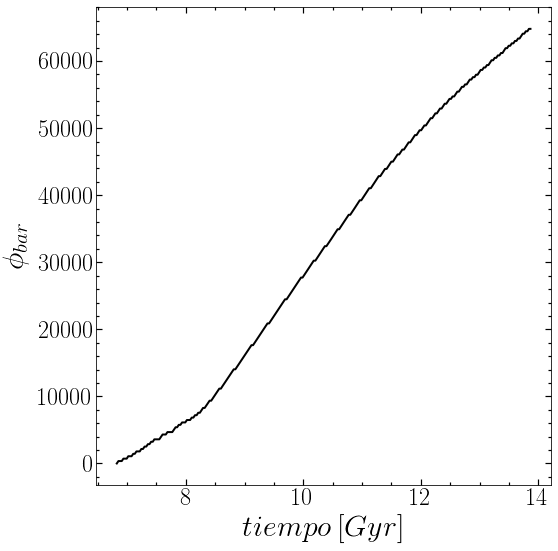

In [25]:
mask, = np.where(time_M31gd > 6.8) 
time_M31gd12 = time_M31gd[mask]
phim_M31gd12 = phim_M31gd[mask]
        
ang = np.zeros(len(phim_M31gd12))
ang[-1] = phim_M31gd12[-1]

j = 1
kk = len(phim_M31gd12)-1

for i in range(kk,0,-1):
    aux = phim_M31gd12[i] - phim_M31gd12[i-1]
    
    if aux > 0:
        ang[i-1] = phim_M31gd12[i-1] + 360*j
        j += 1
        
    else:
        ang[i-1] = phim_M31gd12[i-1] + 360*(j-1)

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time_M31gd12, ang,'k-', lw=2)
# ax.set_xlim(7.5,14)
# ax.set_ylim(8,18)
ax.minorticks_on()
ax.tick_params(labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo\:[Gyr]$', fontsize=30)
ax.set_ylabel(r'$\phi_{bar}$',fontsize=30)
#ax3.axis('square') #hace el plot cuadrado

# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_04.pdf', dpi = 100)
plt.show()

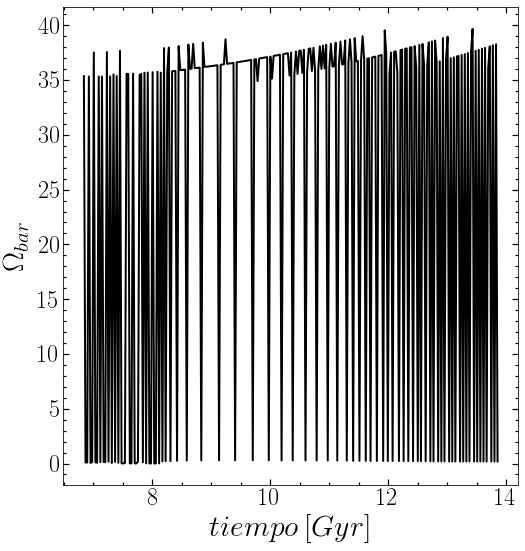

In [26]:
# mask, = np.where(time_M31gd1 > 6.8) 
# time_M31gd1 = time_M31gd1[mask]
# phim_M31gd1 = phim_M31gd1[mask]
        
# ang = np.zeros(len(phim_M31gd1))
# ang[-1] = phim_M31gd1[-1]

# j = 1
# kk = len(phim_M31gd1)-1

# for i in range(kk,0,-1):
#     aux = phim_M31gd1[i] - phim_M31gd1[i-1]
    
#     if aux > 0:
#         ang[i-1] = phim_M31gd1[i-1] + 360*j
#         j += 1
        
#     else:
#         ang[i-1] = phim_M31gd1[i-1] + 360*(j-1)
        
kk = len(ang)-1

delta_phi = np.zeros(len(ang))
delta_t = np.zeros(len(ang))
tt = np.zeros(len(ang))

for i in range(kk,0,-1):
    delta_t [i]  = time_M31gd12[i-1] - time_M31gd12[i]
    delta_phi[i] = ang[i-1] - ang[i]
    tt[i] = (time_M31gd12[i-1] + time_M31gd12[i]) / 2.

delta_t   = delta_t[1:]
delta_phi = delta_phi[1:]
tt = tt[1:]

veloc_ang = delta_phi/delta_t

#-------------------------------------------------------------------------------------
# d = np.ndarray([np.size(tt),2])
# d[:,0] = tt
# d[:,1] = veloc_ang

# np.savetxt('/home/ornela/python/barras/derivada_phi_time.dat', d, fmt=('%12.6f', '%12.6f'))
#-------------------------------------------------------------------------------------

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(tt, veloc_ang/360.,'k-', lw=2)
# ax.set_xlim(7.5,14)
# ax.set_ylim(8,18)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params(labelsize=24)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo\:[Gyr]$', fontsize=30)#, color='lightgray')
ax.set_ylabel(r'$\Omega_{bar}$',fontsize=30)#, color='lightgray')
#ax3.twinx() #me hace un eje del otro lado
#ax3.axis('square') #hace el plot cuadrado
#ax3.set_axisbelow(True)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_04.pdf', dpi = 100)
plt.show()

## Graficamos Rmax vs tiempo

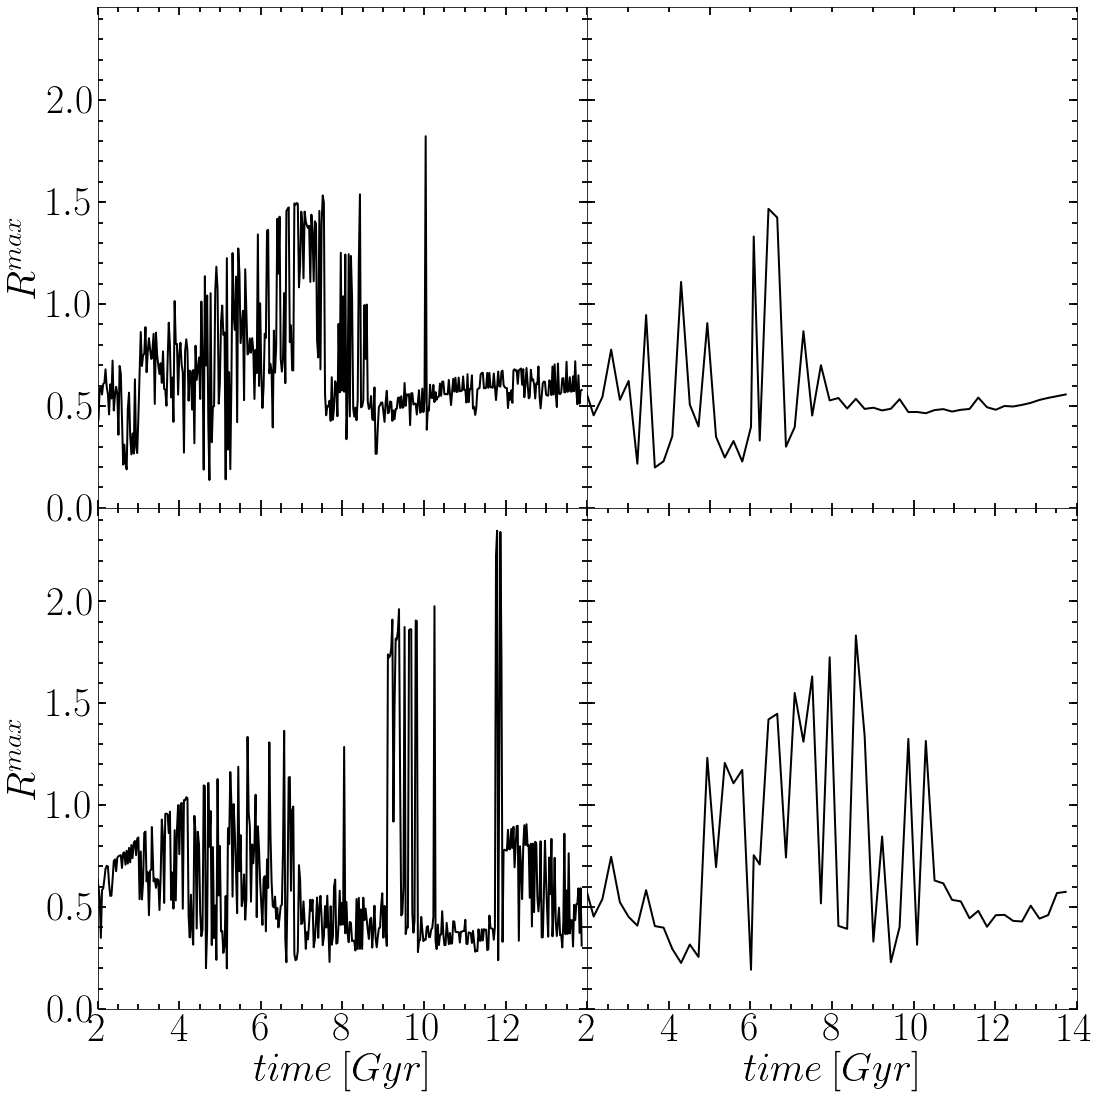

In [11]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16),sharey=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.95, top = 0.95, wspace=0., hspace= 0)

ax[0,0].plot(time_M31gd1 ,rmax_M31gd1,'-', lw=2, color='k')
# ax[0,0].plot(time_M31gd2 ,A2max_M31gd2,'-', lw=3, color='r')
ax[0,0].set_ylabel(r'$R^{max}$', fontsize=40)
ax[0,0].set_xticks([2,4,6,8,10,12,14])
ax[0,0].set_xticklabels([])
# ax[0,0].set_yticks([8,9,10,11,12])
# ax[0,0].set_xticklabels([])
# ax[0,0].set_ylim(8,12.5)
ax[0,0].set_xlim(2,14)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

# ax[0,0].text(2.5, 0.65, 'GADGET-M31', fontsize=30, color='k', ha='left', va='center')

#------------------------------------------------------

# ax2=fig.add_subplot(222)
ax[0,1].plot(time_M31gs1 ,rmax_M31gs1,'-', lw=2, color='k')
# ax[0,1].plot(time_M31gs2 ,A2max_M31gs2,'-',lw=3, color='r')
# ax[0,1].set_xticks([2,4,6,8,10,12,14])
# ax[0,1].set_xticklabels([])
# ax[0,1].set_yticklabels([])
# ax[0,0].set_ylim(0,0.5)
ax[0,1].set_xlim(2,14)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

# ax[0,1].text(2.5, 0.65, 'GASOLINE-M31', fontsize=30, color='k', ha='left', va='center')

# # #---------------------------------------------------------

# ax3=fig.add_subplot(223)
ax[1,0].plot(time_MWgd1 ,rmax_MWgd1,'-', lw=2, color='k')
# ax[1,0].plot(time_MWgd2 ,A2max_MWgd2,'-', lw=3, color='r')

ax[1,0].set_xticks([2,4,6,8,10,12])
ax[1,0].set_ylabel(r'$R^{max}$', fontsize=40)
ax[1,0].set_xlabel(r'$time\:[Gyr]$', fontsize=40)
ax[1,0].set_xlim(2,14)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

# ax[1,0].text(2.5, 0.65, 'GADGET-MW', fontsize=30, color='k', ha='left', va='center')


# # #---------------------------------------------------------------------------------------
# # ax4=fig.add_subplot(224)
ax[1,1].plot(time_MWgs1 ,rmax_MWgs1,'-', lw=2, color='k')
# ax[1,1].plot(time_MWgs2 ,A2max_MWgs2,'-', lw=3, color='r')
ax[1,1].set_xticks([2,4,6,8,10,12,14])
ax[1,1].set_xlabel(r'$time\:[Gyr]$', fontsize=40)
ax[1,1].set_xlim(2,14)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

# ax[1,1].text(2.5, 0.65, 'GASOLINE-MW', fontsize=30, color='k', ha='left', va='center')

fig.savefig('/home/ornela/Dropbox/Presentacion_graficos/Rmax_time.png', dpi = 100, xxbox_inches='tight')

plt.show()